In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

In [2]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,3)
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [3]:
def train(model, optimizer, x_train, y_train):
    epochs = 100
    for epoch in range(epochs + 1):
        prediction = model(x_train)
        cost = F.cross_entropy(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

In [4]:
def test(model, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1] # prediction 중에서 가장 큰 값을 내놓는다.
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)
    
    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [5]:
train(model, optimizer, x_train, y_train)


# Epoch    0/100 Cost: 2.203666
# Epoch    1/100 Cost: 1.989424
# Epoch    2/100 Cost: 1.803548
# Epoch    3/100 Cost: 1.647425
# Epoch    4/100 Cost: 1.520720
# Epoch    5/100 Cost: 1.421076
# Epoch    6/100 Cost: 1.344574
# Epoch    7/100 Cost: 1.286687
# Epoch    8/100 Cost: 1.243165
# Epoch    9/100 Cost: 1.210481
# Epoch   10/100 Cost: 1.185905
# Epoch   11/100 Cost: 1.167381
# Epoch   12/100 Cost: 1.153379
# Epoch   13/100 Cost: 1.142754
# Epoch   14/100 Cost: 1.134649
# Epoch   15/100 Cost: 1.128421
# Epoch   16/100 Cost: 1.123588
# Epoch   17/100 Cost: 1.119791
# Epoch   18/100 Cost: 1.116760
# Epoch   19/100 Cost: 1.114298
# Epoch   20/100 Cost: 1.112257
# Epoch   21/100 Cost: 1.110527
# Epoch   22/100 Cost: 1.109028
# Epoch   23/100 Cost: 1.107700
# Epoch   24/100 Cost: 1.106501
# Epoch   96/100 Cost: 1.050260
# Epoch   97/100 Cost: 1.049548
# Epoch   98/100 Cost: 1.048838
# Epoch   99/100 Cost: 1.048129
# Epoch  100/100 Cost: 1.047422

Epoch    0/100 Cost: 2.203666
Epoch    1/100 Cost: 1.989424
Epoch    2/100 Cost: 1.803548
Epoch    3/100 Cost: 1.647425
Epoch    4/100 Cost: 1.520720
Epoch    5/100 Cost: 1.421076
Epoch    6/100 Cost: 1.344574
Epoch    7/100 Cost: 1.286687
Epoch    8/100 Cost: 1.243165
Epoch    9/100 Cost: 1.210481
Epoch   10/100 Cost: 1.185905
Epoch   11/100 Cost: 1.167381
Epoch   12/100 Cost: 1.153379
Epoch   13/100 Cost: 1.142754
Epoch   14/100 Cost: 1.134649
Epoch   15/100 Cost: 1.128421
Epoch   16/100 Cost: 1.123588
Epoch   17/100 Cost: 1.119791
Epoch   18/100 Cost: 1.116760
Epoch   19/100 Cost: 1.114298
Epoch   20/100 Cost: 1.112257
Epoch   21/100 Cost: 1.110527
Epoch   22/100 Cost: 1.109028
Epoch   23/100 Cost: 1.107700
Epoch   24/100 Cost: 1.106501
Epoch   25/100 Cost: 1.105397
Epoch   26/100 Cost: 1.104365
Epoch   27/100 Cost: 1.103387
Epoch   28/100 Cost: 1.102449
Epoch   29/100 Cost: 1.101543
Epoch   30/100 Cost: 1.100661
Epoch   31/100 Cost: 1.099797
Epoch   32/100 Cost: 1.098948
Epoch   33

In [6]:
test(model, x_test, y_test)

# Accuracy: 0.0% Cost: 1.861790

Accuracy: 0.0% Cost: 1.861790


보면 이미 overfitting이 일어난 상태임을 알 수 있다.

![](./image/2022-01-17-21-36-24.png)

# Learning Rate

$\theta \leftarrow \theta - \alpha \nabla_\theta L(x;\theta)$

Learning Rate가 너무 크면 다음과 같이 발산한다.

![](./image/2022-01-17-21-39-00.png)

너무 작으면 아예 학습이 안되고.

# Data Preprocessing

데이터를 전처리하는 과정을 통해서 문제를 보다 안정적으로 풀 수 있다.

In [7]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

정규분포화 한다.

![](./image/2022-01-17-21-44-13.png)

In [8]:
mu = x_train.mean(dim = 0)
sigma = x_train.std(dim = 0)
norm_x_train = (x_train - mu) / sigma
print(norm_x_train) # gaussian distribution을 따른다.

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [9]:
class MultivariateLienarRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)
    
model = MultivariateLienarRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
def train(model, optimizer, x_train, y_train):
    epochs = 100
    for epoch in range(epochs + 1):
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

In [11]:
train(model, optimizer, norm_x_train, y_train)

# Epoch    1/100 Cost: 28484.753906
# Epoch    2/100 Cost: 27337.447266
# Epoch    3/100 Cost: 26237.316406
# Epoch    4/100 Cost: 25182.328125
# Epoch    5/100 Cost: 24170.564453
# Epoch    6/100 Cost: 23200.175781
# Epoch    7/100 Cost: 22269.408203
# Epoch    8/100 Cost: 21376.582031
# Epoch    9/100 Cost: 20520.101562
# Epoch   10/100 Cost: 19698.441406
# Epoch   11/100 Cost: 18910.128906
# Epoch   12/100 Cost: 18153.785156
# Epoch   13/100 Cost: 17428.066406
# Epoch   14/100 Cost: 16731.705078
# Epoch   15/100 Cost: 16063.479492
# Epoch   16/100 Cost: 15422.226562
# Epoch   17/100 Cost: 14806.833008
# Epoch   18/100 Cost: 14216.231445
# Epoch   19/100 Cost: 13649.401367
# Epoch   20/100 Cost: 13105.369141
# Epoch   21/100 Cost: 12583.198242
# Epoch   22/100 Cost: 12081.996094
# Epoch   23/100 Cost: 11600.904297
# Epoch   24/100 Cost: 11139.104492
# Epoch   96/100 Cost: 605.487915
# Epoch   97/100 Cost: 581.528809
# Epoch   98/100 Cost: 558.518677
# Epoch   99/100 Cost: 536.420349
# Epoch  100/100 Cost: 515.196899

Epoch    0/100 Cost: 29681.355469
Epoch    1/100 Cost: 28484.753906
Epoch    2/100 Cost: 27337.447266
Epoch    3/100 Cost: 26237.316406
Epoch    4/100 Cost: 25182.328125
Epoch    5/100 Cost: 24170.564453
Epoch    6/100 Cost: 23200.175781
Epoch    7/100 Cost: 22269.408203
Epoch    8/100 Cost: 21376.582031
Epoch    9/100 Cost: 20520.101562
Epoch   10/100 Cost: 19698.441406
Epoch   11/100 Cost: 18910.128906
Epoch   12/100 Cost: 18153.785156
Epoch   13/100 Cost: 17428.066406
Epoch   14/100 Cost: 16731.705078
Epoch   15/100 Cost: 16063.479492
Epoch   16/100 Cost: 15422.226562
Epoch   17/100 Cost: 14806.833008
Epoch   18/100 Cost: 14216.231445
Epoch   19/100 Cost: 13649.401367
Epoch   20/100 Cost: 13105.369141
Epoch   21/100 Cost: 12583.198242
Epoch   22/100 Cost: 12081.996094
Epoch   23/100 Cost: 11600.904297
Epoch   24/100 Cost: 11139.104492
Epoch   25/100 Cost: 10695.811523
Epoch   26/100 Cost: 10270.271484
Epoch   27/100 Cost: 9861.763672
Epoch   28/100 Cost: 9469.596680
Epoch   29/100 C

![](./image/2022-01-17-22-47-45.png)

최적화를 하지 않으면 첫 column만 줄어들고 두 번째 column은 그대로 유지. 이미 작으니깐
이를 해결하기 위해 normalization을 하는 것이다.

# MNIST

In [22]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

batch_size = 128
training_epochs = 100

mnist_train = dsets.MNIST(root="MNIST_data/",
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root="MNIST_data/",
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

# 불러온 값을 사용하기 위해 dataloader를 사용한다.
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                   batch_size=batch_size,
                                   shuffle=True,
                                   drop_last=True) # batch_size에 안맞고 남는 data 버린다.

for epoch in range(training_epochs):
    for X, Y in data_loader:
        X = X.view(-1,28*28) # reshape image to 784, but Label should be onehotecoded
        # 참고로 X는 (batch size, 1, 28, 28)이었는데 그 이후 (batch size, 784)가 된다.

In [24]:
linear = nn.Linear(784,10,bias=True)
training_epochs = 15
batch_size = 128

criterion = nn.CrossEntropyLoss() # F.cross_entropy는 정의 할 때 모든 걸 설정해야한다.
optimizer = optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    len_total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28*28)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / len_total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 0.575375974
Epoch: 0002 cost = 0.374016970
Epoch: 0003 cost = 0.342421621
Epoch: 0004 cost = 0.326022476
Epoch: 0005 cost = 0.315575600
Epoch: 0006 cost = 0.307909369
Epoch: 0007 cost = 0.302397579
Epoch: 0008 cost = 0.297522157
Epoch: 0009 cost = 0.293116540
Epoch: 0010 cost = 0.290487796
Epoch: 0011 cost = 0.287488163
Epoch: 0012 cost = 0.285288155
Epoch: 0013 cost = 0.282853276
Epoch: 0014 cost = 0.280928671
Epoch: 0015 cost = 0.279262871


In [33]:
with torch.no_grad(): # test할 때 꼭 넣어주자. 오류가 줄어든다.
    X_test = mnist_test.test_data.view(-1,28*28).float()
    Y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy : ", accuracy.item())

Accuracy :  0.890999972820282


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label :  0
Prediction :  0


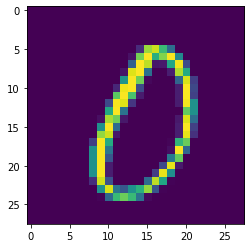

In [58]:
# Visualization
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
x_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float()
Y_single_data = mnist_test.test_labels[r:r+1]

print("Label : ", Y_single_data.item())
single_prediction = linear(x_single_data)
print("Prediction : ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28))
plt.show()